<a href="https://colab.research.google.com/github/AudreyMx/AudreyMx/blob/main/Life_expectancy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring how different factors impact life expectancy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = '/content/Life_expectancy_C.csv'

In [6]:
LE = pd.read_csv(data)

In [24]:
LE.head()

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2014  Developing             59.9              271   
1  Afghanistan  2013  Developing             59.9              268   
2  Afghanistan  2012  Developing             59.5              272   
3  Afghanistan  2011  Developing             59.2              275   
4  Afghanistan  2010  Developing             58.8              279   

   infant_deaths  percentage_expenditure  measles  under_five_deaths  polio  \
0             64               73.523582      492                 86   58.0   
1             66               73.219243      430                 89   62.0   
2             69               78.184215     2787                 93   67.0   
3             71                7.097109     3013                 97   68.0   
4             74               79.679367     1989                102   66.0   

   total_expenditure  diphtheria  HIV_AIDS         GDP  population  \
0               8.18        62.0       0.1  612.696514      327582   
1               8.13        64.0       0.1  631.744976    31731688   
2               8.52        67.0       0.1  669.959000     3696958   
3               7.87        68.0       0.1   63.537231     2978599   
4               9.20        66.0       0.1  553.328940     2883167   

   income_composition_of_resources  schooling  
0                            0.476       10.0  
1                            0.470        9.9  
2                            0.463        9.8  
3                            0.454        9.5  
4                            0.448        9.2

In [15]:
LE

country  year      status  life_expectancy  adult_mortality  \
0     Afghanistan  2014  Developing             59.9              271   
1     Afghanistan  2013  Developing             59.9              268   
2     Afghanistan  2012  Developing             59.5              272   
3     Afghanistan  2011  Developing             59.2              275   
4     Afghanistan  2010  Developing             58.8              279   
...           ...   ...         ...              ...              ...   
2113     Zimbabwe  2004  Developing             44.3              723   
2114     Zimbabwe  2003  Developing             44.5              715   
2115     Zimbabwe  2002  Developing             44.8               73   
2116     Zimbabwe  2001  Developing             45.3              686   
2117     Zimbabwe  2000  Developing             46.0              665   

      infant_deaths  percentage_expenditure  measles  under_five_deaths  \
0                64               73.523582      492                 86   
1                66               73.219243      430                 89   
2                69               78.184215     2787                 93   
3                71                7.097109     3013                 97   
4                74               79.679367     1989                102   
...             ...                     ...      ...                ...   
2113             27                0.000000       31                 42   
2114             26                0.000000      998                 41   
2115             25                0.000000      304                 40   
2116             25                0.000000      529                 39   
2117             24                0.000000     1483                 39   

      polio  total_expenditure  diphtheria  HIV_AIDS         GDP  population  \
0      58.0               8.18        62.0       0.1  612.696514      327582   
1      62.0               8.13        64.0       0.1  631.744976    31731688   
2      67.0               8.52        67.0       0.1  669.959000     3696958   
3      68.0               7.87        68.0       0.1   63.537231     2978599   
4      66.0               9.20        66.0       0.1  553.328940     2883167   
...     ...                ...         ...       ...         ...         ...   
2113   67.0               7.13        65.0      33.6  454.366654    12777511   
2114    7.0               6.52        68.0      36.7  453.351155    12633897   
2115   73.0               6.53        71.0      39.8   57.348340      125525   
2116   76.0               6.16        75.0      42.1  548.587312    12366165   
2117   78.0               7.10        78.0      43.5  547.358878    12222251   

      income_composition_of_resources  schooling  
0                               0.476       10.0  
1                               0.470        9.9  
2                               0.463        9.8  
3                               0.454        9.5  
4                               0.448        9.2  
...                               ...        ...  
2113                            0.407        9.2  
2114                            0.418        9.5  
2115                            0.427       10.0  
2116                            0.427        9.8  
2117                            0.434        9.8  

[2118 rows x 17 columns]

In [21]:
LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2118 non-null   object 
 1   year                             2118 non-null   int64  
 2   status                           2118 non-null   object 
 3   life_expectancy                  2118 non-null   float64
 4   adult_mortality                  2118 non-null   int64  
 5   infant_deaths                    2118 non-null   int64  
 6   percentage_expenditure           2118 non-null   float64
 7   measles                          2118 non-null   int64  
 8   under_five_deaths                2118 non-null   int64  
 9   polio                            2110 non-null   float64
 10  total_expenditure                2118 non-null   float64
 11  diphtheria                       2110 non-null   float64
 12  HIV_AIDS            

In [92]:
LE.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2118.000000      2118.000000      2118.000000    2118.000000   
mean   2007.000472        68.605099       170.208687      34.795090   
std       4.316538         9.877039       130.371262     134.702007   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2003.000000        62.100000        72.000000       0.000000   
50%    2007.000000        71.400000       146.500000       3.000000   
75%    2011.000000        75.400000       237.000000      23.000000   
max    2014.000000        89.000000       723.000000    1800.000000   

       percentage_expenditure        measles  under_five_deaths        polio  \
count             2118.000000    2118.000000        2118.000000  2110.000000   
mean               896.841078    2636.222852          48.454674    81.327962   
std               2235.919948   11777.789239         183.403475    23.745320   
min                  0.000000       0.000000           0.000000     3.000000   
25%                 31.668263       0.000000           1.000000    75.000000   
50%                126.656161      18.000000           4.000000    92.000000   
75%                549.676784     470.500000          32.000000    96.000000   
max              19479.911610  212183.000000        2500.000000    99.000000   

       total_expenditure   diphtheria     HIV_AIDS            GDP  \
count        2118.000000  2110.000000  2118.000000    2118.000000   
mean            6.010675    81.346445     2.145798    6672.909350   
std             2.367255    23.917134     5.839474   13752.553474   
min             0.370000     2.000000     0.100000       1.681350   
25%             4.380000    77.000000     0.100000     418.393776   
50%             5.885000    92.000000     0.100000    1456.398383   
75%             7.700000    96.000000     1.200000    4954.777690   
max            14.390000    99.000000    50.600000  119172.741800   

         population  income_composition_of_resources    schooling  
count  2.118000e+03                      2118.000000  2118.000000  
mean   1.294796e+07                         0.617631    11.871105  
std    6.293129e+07                         0.210289     3.359783  
min    3.400000e+01                         0.000000     0.000000  
25%    1.945955e+05                         0.476250     9.800000  
50%    1.354634e+06                         0.662500    12.100000  
75%    7.289765e+06                         0.765750    14.300000  
max    1.293859e+09                         0.945000    20.700000

<Axes: xlabel='total_expenditure', ylabel='life_expectancy'>

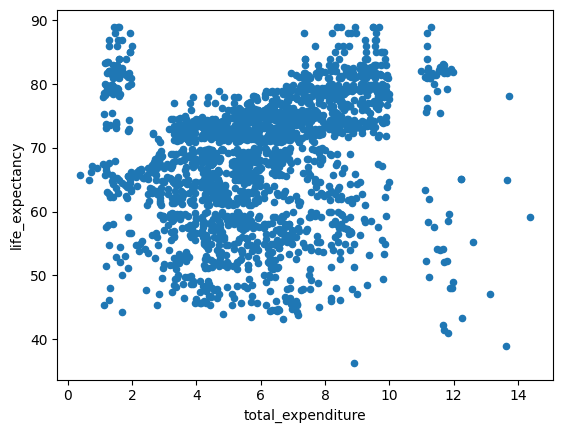

In [31]:
LE.plot(x='total_expenditure', y='life_expectancy', kind='scatter')

<Axes: xlabel='life_expectancy', ylabel='Count'>

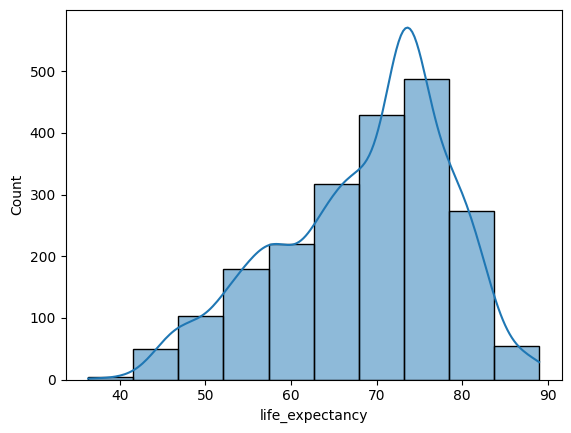

In [41]:
sns.histplot(data=LE, x='life_expectancy', bins=10, kde='true')

<Axes: xlabel='life_expectancy', ylabel='total_expenditure'>

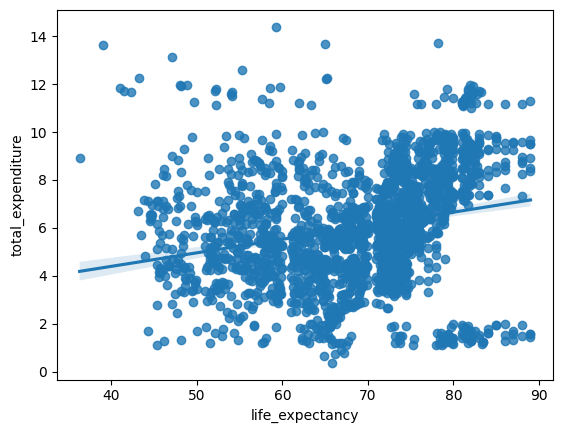

In [43]:
sns.regplot(x='life_expectancy', y='total_expenditure', data=LE)

<Axes: xlabel='total_expenditure', ylabel='GDP'>

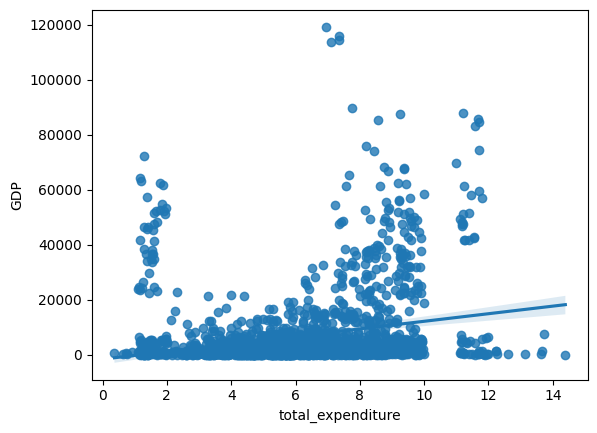

In [47]:
sns.regplot(x='total_expenditure', y='GDP', data=LE)

In [ ]:
sns.heatmap(LE.corr(), annot=True, cmap='Blues')

<ipython-input-52-72f340578c62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(LE.corr(), annot=True, cmap='mako')


<Axes: >

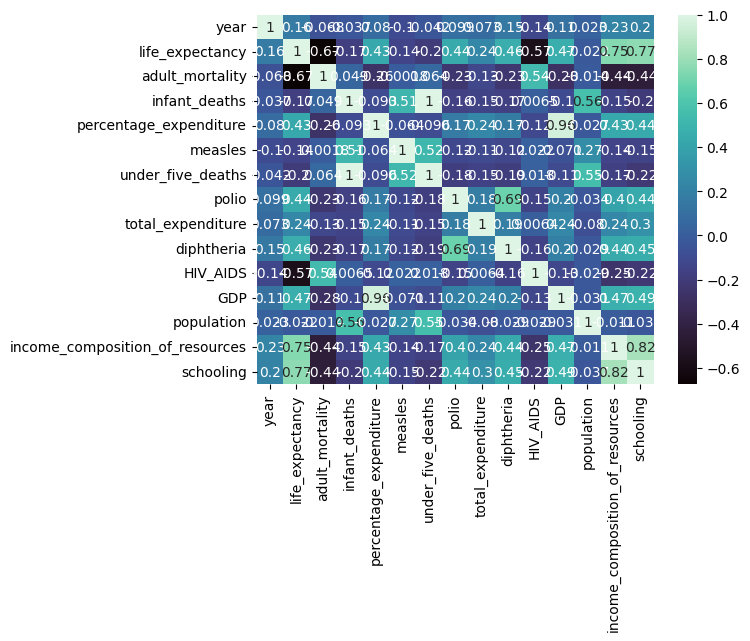

In [52]:
sns.heatmap(LE.corr(), annot=True, cmap='mako')

<Axes: title={'center': 'Total expenditure vs Life expectancy'}, xlabel='life_expectancy', ylabel='total_expenditure'>

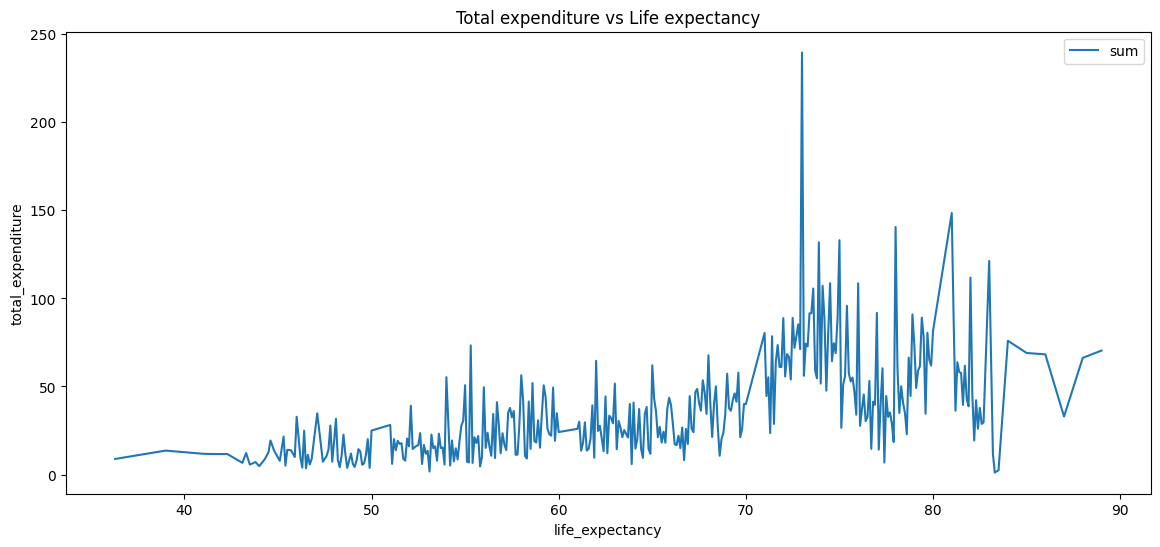

In [13]:
plt.figure(figsize=(14,6))
plt.title("Total expenditure vs Life expectancy")
sns.lineplot(x='life_expectancy', y='total_expenditure', data=LE, estimator=np.sum, label='sum', errorbar=None)


<Axes: xlabel='status', ylabel='count'>

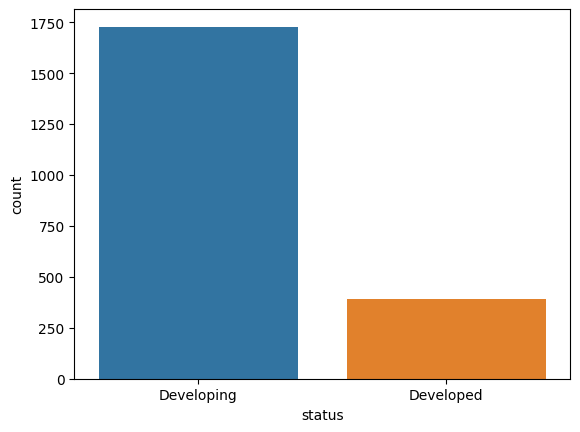

In [72]:
sns.countplot(x='status', data=LE)

<Axes: xlabel='schooling', ylabel='total_expenditure'>

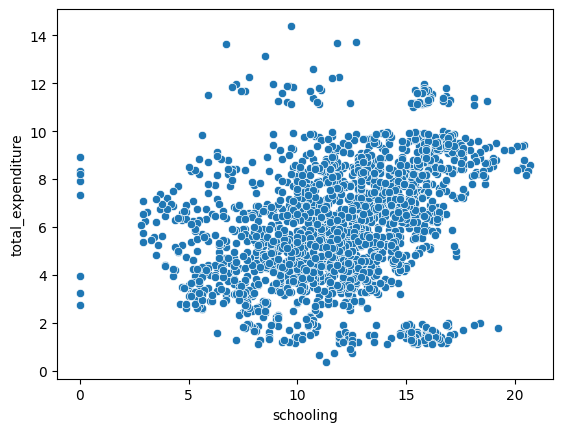

In [75]:
sns.scatterplot(x=LE ['schooling'], y=LE ['total_expenditure'])

<Axes: xlabel='income_composition_of_resources', ylabel='total_expenditure'>

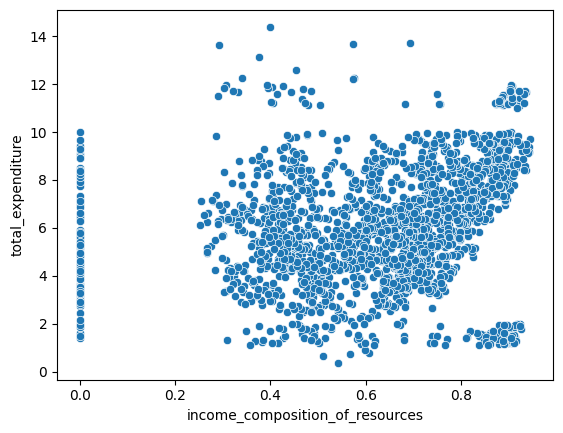

In [77]:
sns.scatterplot(x=LE ['income_composition_of_resources'], y=LE ['total_expenditure'])

<Axes: xlabel='status', ylabel='GDP'>

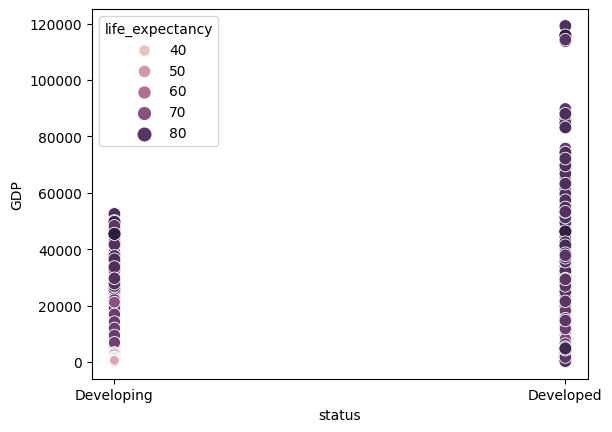

In [83]:
sns.scatterplot(x=LE ['status'], y=LE ['GDP'], size=LE ['life_expectancy'], sizes=(40,90),hue=LE ['life_expectancy'])

<Axes: xlabel='status', ylabel='total_expenditure'>

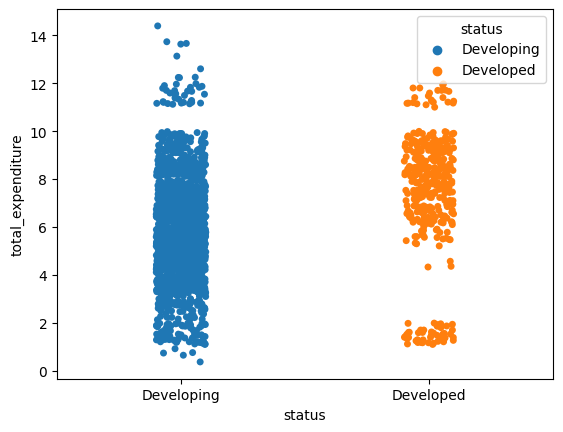

In [85]:
sns.stripplot(x='status', y='total_expenditure', data=LE, hue='status')

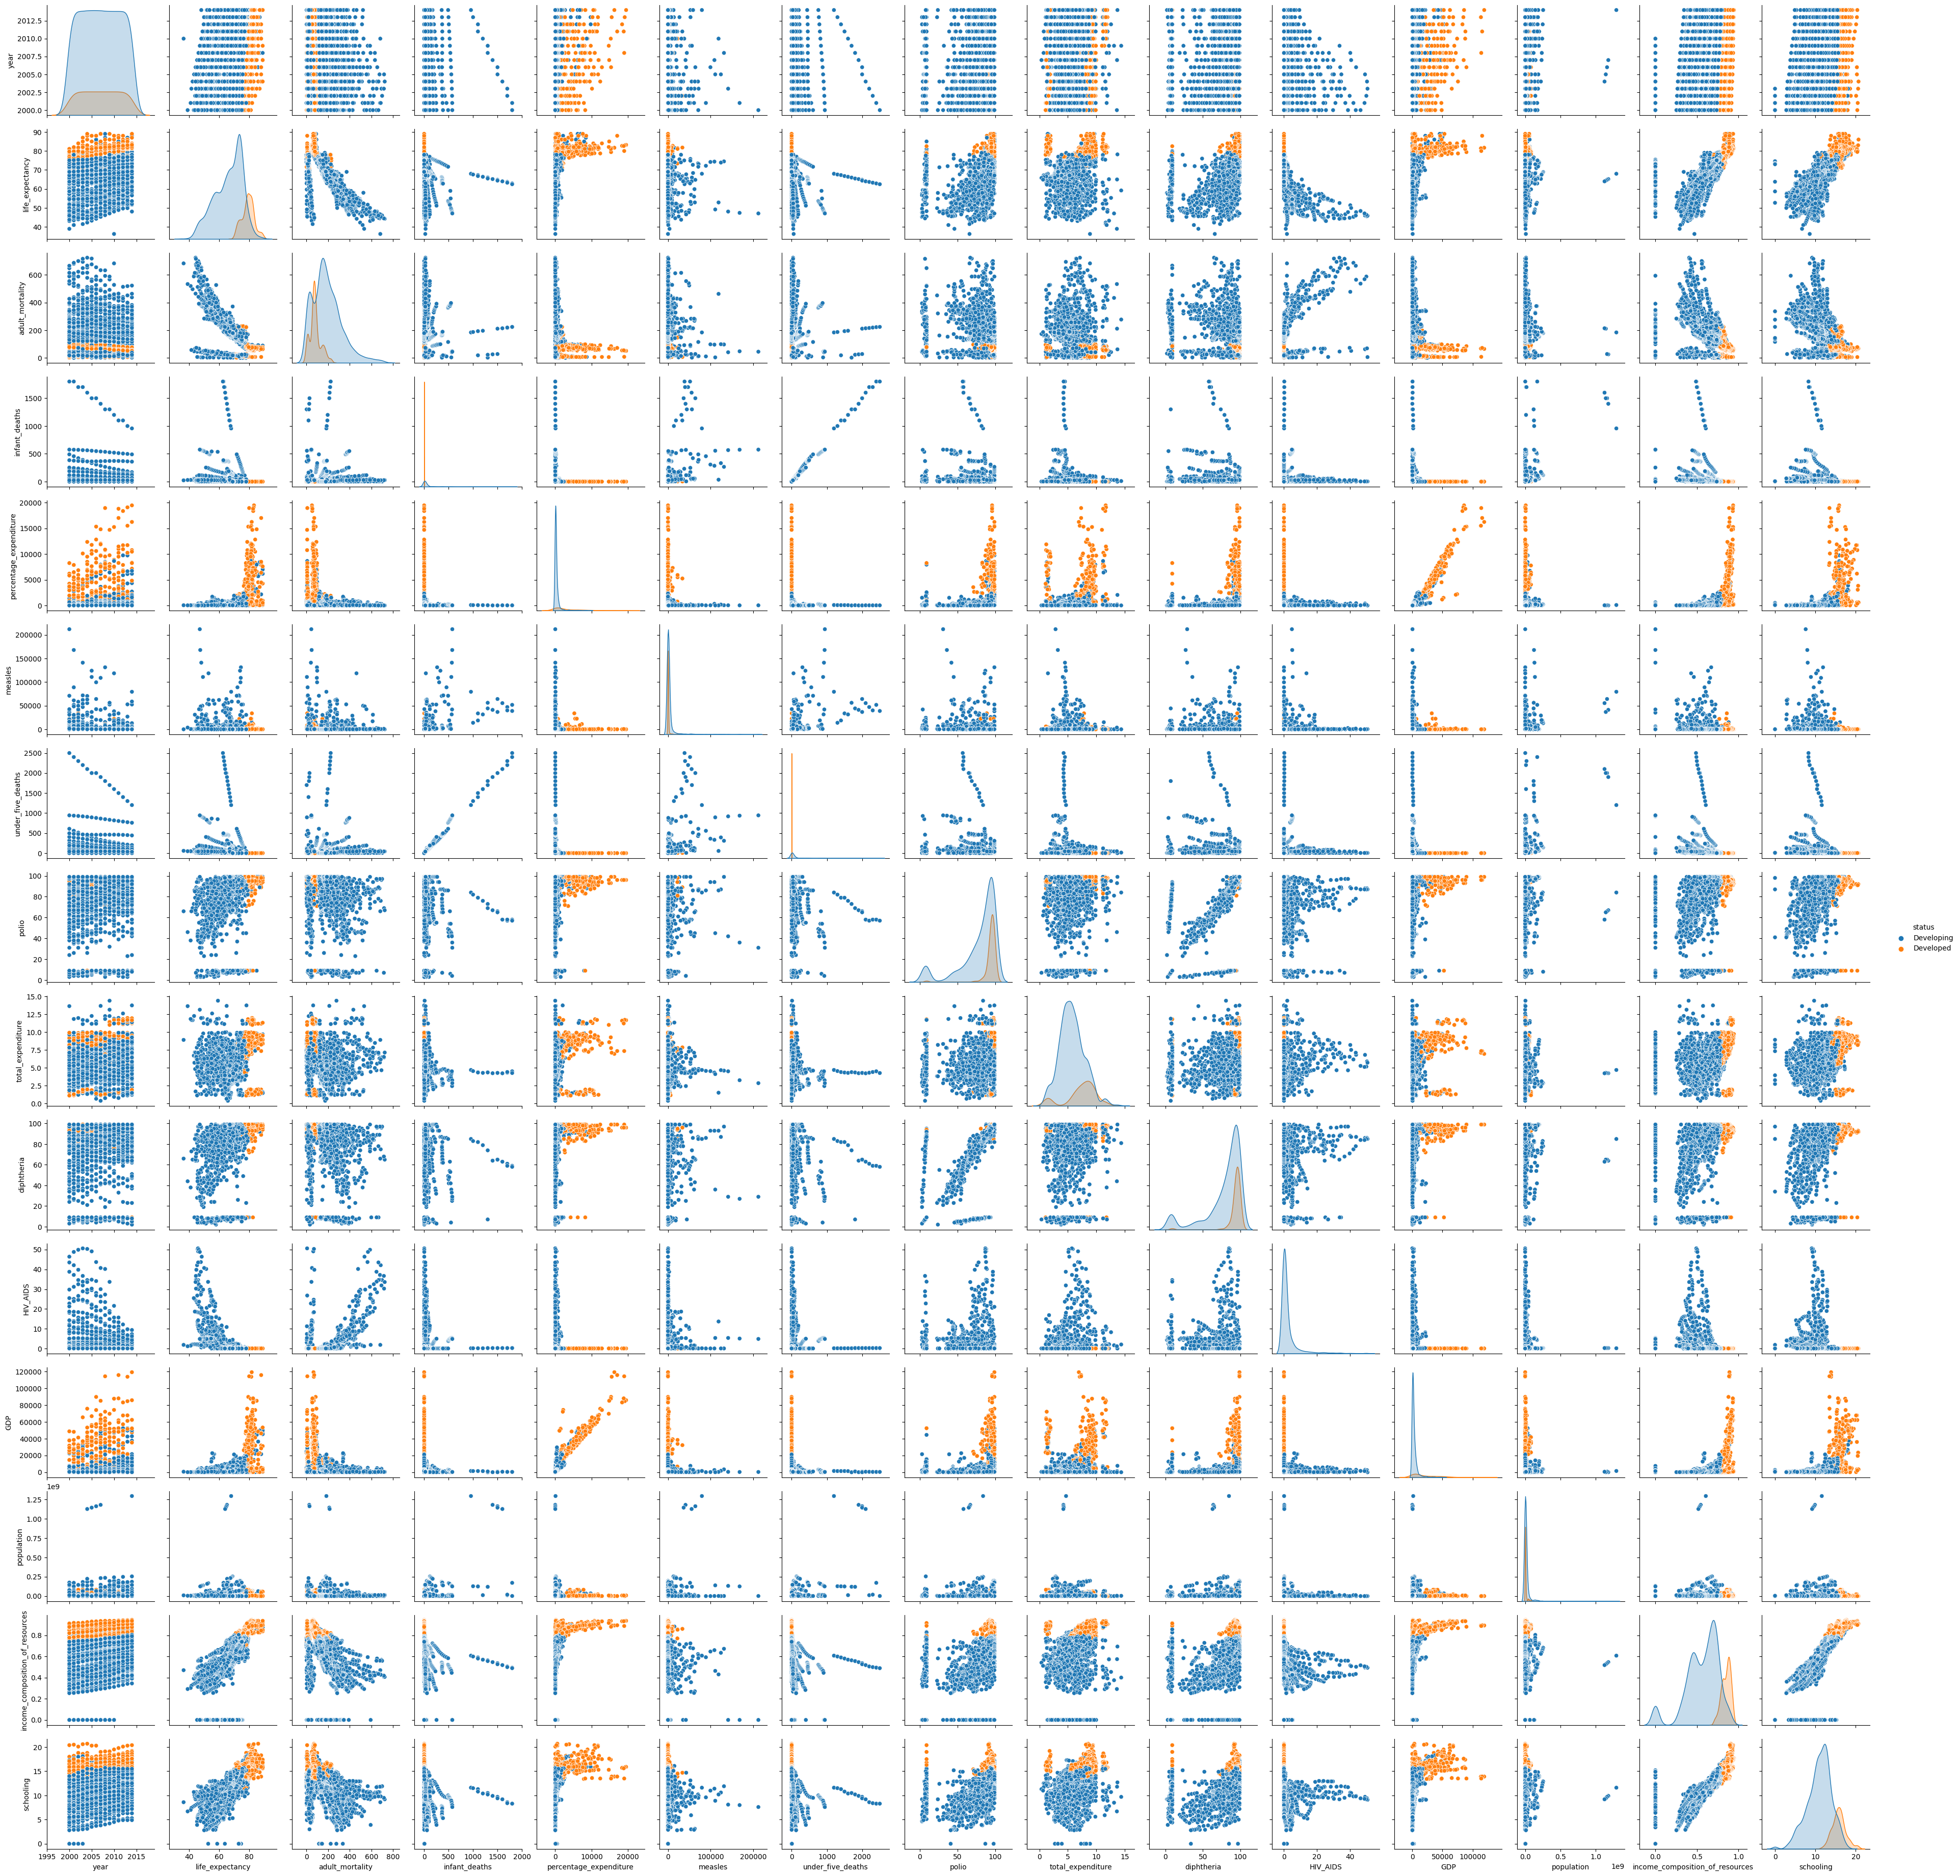

In [86]:
sns.pairplot(LE, kind='scatter', hue='status')